In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [2]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 30s 179ms/step - loss: 0.6085 - acc: 0.6560 - val_loss: 0.5653 - val_acc: 0.7156
Epoch 2/10
157/157 [==============================] - 28s 178ms/step - loss: 0.3788 - acc: 0.8407 - val_loss: 0.4508 - val_acc: 0.8236
Epoch 3/10
157/157 [==============================] - 28s 178ms/step - loss: 0.2888 - acc: 0.8827 - val_loss: 0.4580 - val_acc: 0.7830
Epoch 4/10
157/157 [==============================] - 28s 178ms/step - loss: 0.2354 - acc: 0.9094 - val_loss: 0.4127 - val_acc: 0.8344
Epoch 5/10
157/157 [==============================] - 28s 178ms/step - loss: 0.1914 - acc: 0.9275 - val_loss: 0.4492 - val_acc: 0.8190
Epoch 6/10
157/157 [==============================] - 28s 180ms/step - loss: 0.1435 - acc: 0.9488 - val_loss: 0.5535 - val_acc: 0.7688
Epoch 7/10
157/157 [==============================] - 28s 178ms/step - loss: 0.1118 - acc: 0.9608 - val_loss: 0.4345 - val_acc: 0.8396
Epoch 8/10
157/157 [==============================] - 2

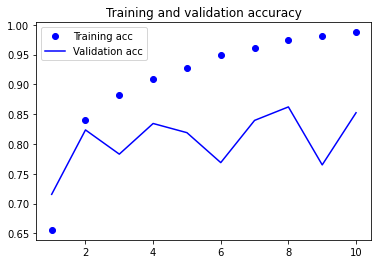

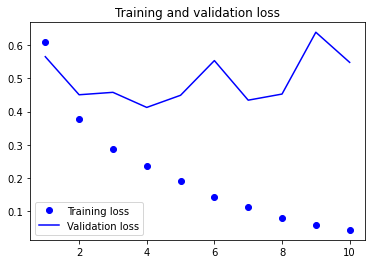

In [5]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [6]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 60s 369ms/step - loss: 0.4952 - acc: 0.7667 - val_loss: 0.4068 - val_acc: 0.8320
Epoch 2/10
157/157 [==============================] - 58s 370ms/step - loss: 0.2900 - acc: 0.8877 - val_loss: 0.5804 - val_acc: 0.8104
Epoch 3/10
157/157 [==============================] - 58s 371ms/step - loss: 0.2361 - acc: 0.9113 - val_loss: 0.2761 - val_acc: 0.8864
Epoch 4/10
157/157 [==============================] - 58s 368ms/step - loss: 0.1961 - acc: 0.9284 - val_loss: 0.2981 - val_acc: 0.8924
Epoch 5/10
157/157 [==============================] - 58s 370ms/step - loss: 0.1784 - acc: 0.9362 - val_loss: 0.3321 - val_acc: 0.8802
Epoch 6/10
157/157 [==============================] - 58s 368ms/step - loss: 0.1579 - acc: 0.9437 - val_loss: 0.3932 - val_acc: 0.8774
Epoch 7/10
157/157 [==============================] - 58s 370ms/step - loss: 0.1442 - acc: 0.9492 - val_loss: 0.3548 - val_acc: 0.8758
Epoch 8/10
157/157 [==============================] - 5

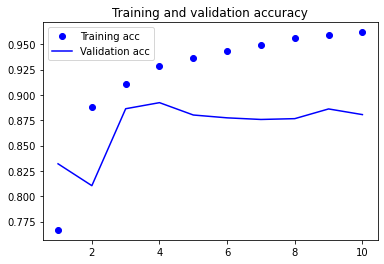

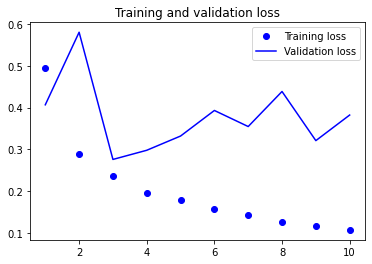

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()